In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid')


Mounted at /content/drive


In [3]:
# Load Historical Trader Data
trades_path = '/content/drive/MyDrive/historical_data.csv'  # change name if different
trades_df = pd.read_csv(trades_path)

# Load Fear-Greed Index Data
sentiment_path = '/content/drive/MyDrive/fear_greed_index.csv'  # change name if different
sentiment_df = pd.read_csv(sentiment_path)


In [6]:
print("Trader Data:")
display(trades_df.columns)

print("\nSentiment Data:")
display(sentiment_df.columns)


Trader Data:


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


Sentiment Data:


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [7]:
# Convert trader timestamps with day-first format
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True, errors='coerce')
trades_df['date'] = trades_df['Timestamp IST'].dt.date

# Convert sentiment 'date' column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date


In [8]:
# Merge on 'date'
merged_df = pd.merge(trades_df, sentiment_df[['date', 'classification']], on='date', how='left')
merged_df.dropna(subset=['classification'], inplace=True)


/tmp/ipython-input-9-2877588730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', palette='coolwarm')


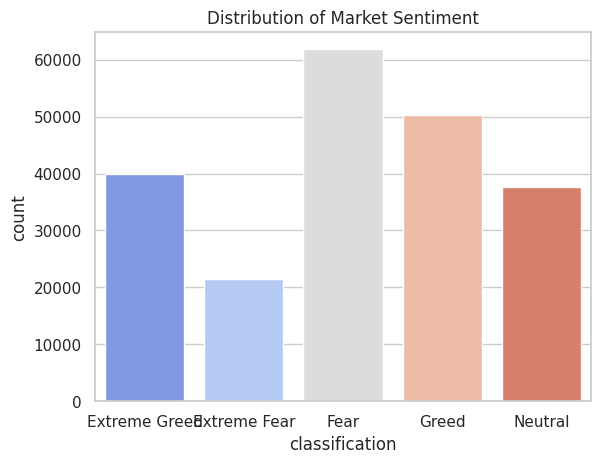

/tmp/ipython-input-9-2877588730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='viridis')


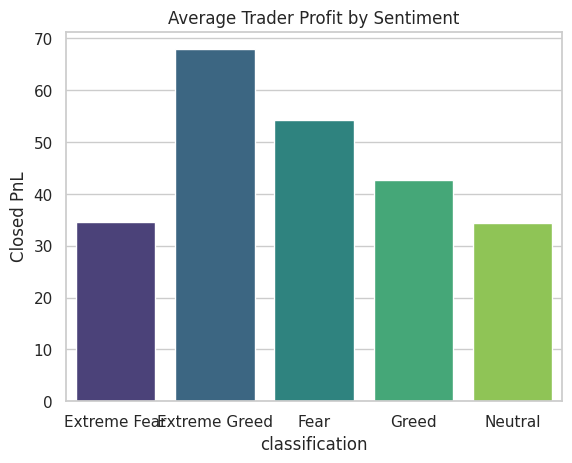

In [9]:
# Distribution of Fear/Greed days
sns.countplot(data=merged_df, x='classification', palette='coolwarm')
plt.title('Distribution of Market Sentiment')
plt.show()

# Average Closed PnL by Sentiment
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='viridis')
plt.title('Average Trader Profit by Sentiment')
plt.show()


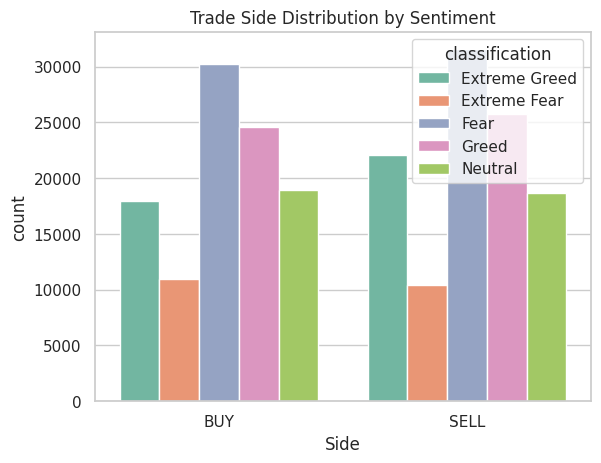

In [10]:
# Distribution of Trade Sides
sns.countplot(data=merged_df, x='Side', hue='classification', palette='Set2')
plt.title('Trade Side Distribution by Sentiment')
plt.show()


In [11]:
# If leverage is available
if 'Leverage' in merged_df.columns:
    merged_df['Leverage'] = pd.to_numeric(merged_df['Leverage'], errors='coerce')
    sns.boxplot(data=merged_df, x='classification', y='Leverage')
    plt.title('Leverage Used on Fear vs Greed Days')
    plt.show()


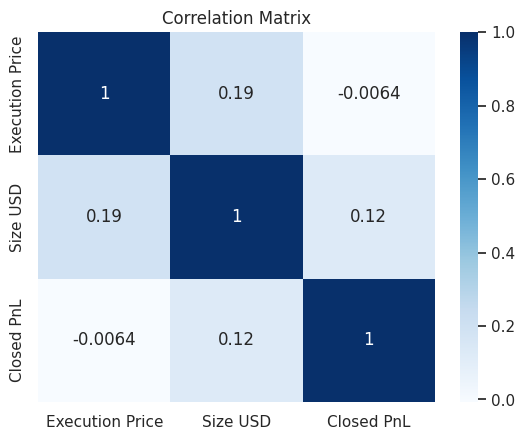

In [12]:
numeric_cols = ['Execution Price', 'Size USD', 'Closed PnL']
corr = merged_df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


In [14]:
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL'].mean()
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL'].mean()

print("Insights:")
print(f"1. Average PnL on Fear days: {fear_pnl:.2f}")
print(f"2. Average PnL on Greed days: {greed_pnl:.2f}")

side_sentiment = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
print("\n3. Average PnL by Trade Side and Sentiment:\n", side_sentiment)


Insights:
1. Average PnL on Fear days: 54.29
2. Average PnL on Greed days: 42.74

3. Average PnL by Trade Side and Sentiment:
 Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408
